In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Ratings
ratings = pd.read_csv(
    "../data/ml-100k/u.data",
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

# Movies (titles + genres)
movies = pd.read_csv(
    "../data/ml-100k/u.item",
    sep="|",
    encoding="latin-1",
    header=None
)


In [3]:
genre_cols = [
    "unknown", "Action", "Adventure", "Animation", "Children",
    "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
    "Film-Noir", "Horror", "Musical", "Mystery", "Romance",
    "Sci-Fi", "Thriller", "War", "Western"
]

movies.columns = (
    ["movie_id", "title", "release_date", "video_release_date", "IMDb_URL"]
    + genre_cols
)


In [4]:
%run ./04_model_evaluation.ipynb


Train size: 80000
Test size: 20000
RMSE: 0.9888
MAE: 0.7834


In [5]:
eval_with_genre = eval_df.merge(
    movies[["movie_id"] + genre_cols],
    on="movie_id",
    how="left"
)


In [6]:
genre_errors = {}

for genre in genre_cols[1:]:  # ignore 'unknown'
    genre_mask = eval_with_genre[genre] == 1
    genre_errors[genre] = eval_with_genre.loc[genre_mask, "abs_error"].mean()

genre_error_df = pd.Series(genre_errors).sort_values()
genre_error_df


Film-Noir      0.730932
Western        0.734351
Mystery        0.752383
Drama          0.760167
Thriller       0.762430
Animation      0.762660
Romance        0.768628
Crime          0.770968
War            0.772072
Action         0.775274
Sci-Fi         0.783914
Adventure      0.786121
Fantasy        0.787748
Comedy         0.806997
Musical        0.815005
Children       0.823482
Horror         0.839877
Documentary    0.887267
dtype: float64

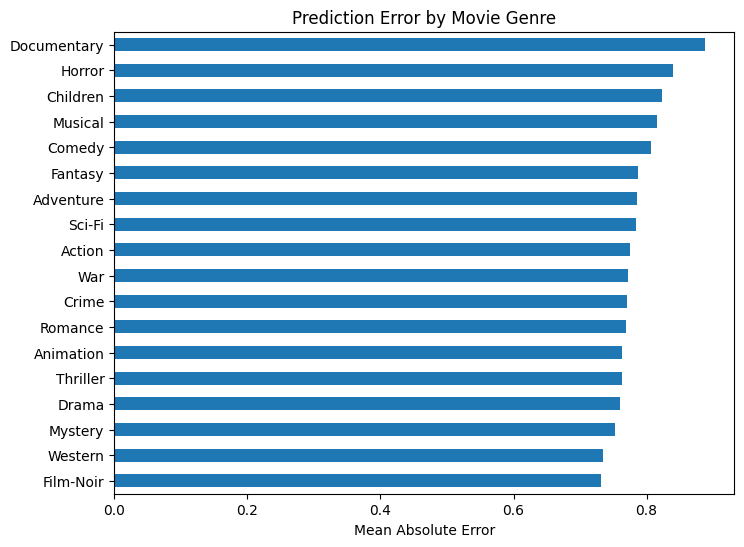

In [7]:
genre_error_df.plot(kind="barh", figsize=(8, 6))
plt.xlabel("Mean Absolute Error")
plt.title("Prediction Error by Movie Genre")
plt.show()


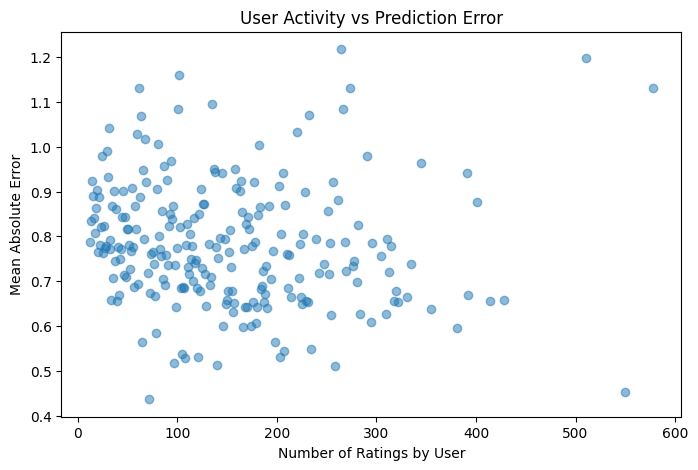

In [8]:
user_error = eval_df.groupby("user_rating_count")["abs_error"].mean()

plt.figure(figsize=(8, 5))
plt.scatter(user_error.index, user_error.values, alpha=0.5)
plt.xlabel("Number of Ratings by User")
plt.ylabel("Mean Absolute Error")
plt.title("User Activity vs Prediction Error")
plt.show()


In [9]:
movie_popularity = ratings.groupby("movie_id").size()

eval_df["movie_rating_count"] = eval_df["movie_id"].map(movie_popularity)


In [10]:
eval_df.groupby(
    pd.qcut(eval_df["movie_rating_count"], 4)
)["abs_error"].mean()


movie_rating_count
(1.999, 70.0]     0.852595
(70.0, 143.0]     0.783954
(143.0, 239.0]    0.733899
(239.0, 583.0]    0.762631
Name: abs_error, dtype: float64